In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import XGBoost from sklearn
#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv("data/us2013a/us2013a.csv")
print(df.shape)

In [42]:
hhincome=df["HHINCOME"]
median_income = hhincome.median()
df["HHINCOME_ABOVE_MEDIAN"] = (hhincome > median_income).astype(int)
# FTOTINC reports the total pre-tax money income earned by one's family (as defined by FAMUNIT) from all sources for the previous year.
# Removing FTOTINC from the dataset because it is too correlated with HHINCOME
#X=df.drop(["HHINCOME","HHINCOME_ABOVE_MEDIAN","OCCSOC","INDNAICS","FTOTINC"],axis=1)
X=df.drop(["HHINCOME","HHINCOME_ABOVE_MEDIAN","OCCSOC","INDNAICS","FTOTINC","POVERTY"],axis=1)
y=df["HHINCOME_ABOVE_MEDIAN"]

In [26]:
'''
print(np.corrcoef(df["HHINCOME"],df["OCCSCORE"]))
for col in X.columns:
    if np.corrcoef(X[col],y)[0,1] > 0.5:
        print(col,np.corrcoef(X[col],y)[0,1])
'''

[[ 1.         -0.05812651]
 [-0.05812651  1.        ]]


c:\Users\Katrina\anaconda3\envs\184-hw4-2\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Katrina\anaconda3\envs\184-hw4-2\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [44]:
# fit model on X to predict y
model = XGBClassifier()
# split into train and test splits
seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed)
# fit model on training data
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 91.17%


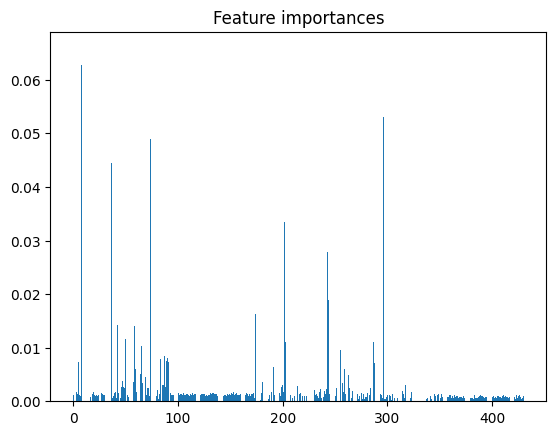

In [29]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.title("Feature importances")
plt.show()

In [40]:
# 16 features have feature_importance >0.01, and the max feature importance is 0.065
for i in range(len(X.columns)):
    if model.feature_importances_[i]>0.01:
        print(X.columns[i],model.feature_importances_[i])

NUMPREC 0.08849892
HHTYPE 0.054218672
GQ 0.043286953
SHOWER 0.010939904
BEDROOMS 0.011525798
CINETHH 0.016549438
CIOTHSVC 0.010348187
CBNSUBFAM 0.010527294
FAMSIZE 0.010881671
RELATE 0.032413065
RELATED 0.083407395
AGE 0.011276713
HINSCARE 0.03648601
INCTOT 0.02185588
POVERTY 0.11947964


In [39]:
print(X_train.shape,X_test.shape)

(80000, 432) (20000, 432)


### Feature selection

In [45]:
from sklearn.feature_selection import SelectFromModel
thresh=0.01
# keep most predictive 16 features
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
# train model
selection_model = XGBClassifier()
selection_model.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(X_test)
y_pred = selection_model.predict(select_X_test)
accuracy = accuracy_score(y_pred,y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

c:\Users\Katrina\anaconda3\envs\184-hw4-2\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Accuracy: 84.70%


c:\Users\Katrina\anaconda3\envs\184-hw4-2\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [47]:
from sklearn.feature_selection import SelectFromModel
thresh=0.005
# keep most predictive 31 features
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
print(select_X_train.shape)
# train model
selection_model = XGBClassifier()
selection_model.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(X_test)
y_pred = selection_model.predict(select_X_test)
accuracy = accuracy_score(y_pred,y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

c:\Users\Katrina\anaconda3\envs\184-hw4-2\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(80000, 31)


c:\Users\Katrina\anaconda3\envs\184-hw4-2\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Accuracy: 87.59%
